# Feature Analysis for Building Linear Regression


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
%matplotlib inline

**Task 1**: Load the `medical-charges.csv` data into a pandas DataFrame and display the first 5 records. Describe how you might approach predicting the `charges` column based on other columns using your current knowledge (without ML methods, just analytics). Write 3 or more ideas below:


In [37]:
path = "../../../data/medical-charges.csv"
medical_df = pd.read_csv(path)
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### HW1 Conclusion

- You can create a set of rules and define certain thresholds for each category. Based on these groups, you can select the average value (within them) for calculating payouts.
    1. Smokers have more health problems, so they pay more.
    2. Similarly for age: as age increases, the charge increases.
    3. BMI over 30 is a risk zone.

**Task 2**: Visualize the distribution of medical charges (`charges`) as an interactive plotly histogram, split by feature categories:
1. `sex`
2. `region`

Add a marginal boxplot above for the discrete feature categories.
Use the visualization example from the lecture.
Describe your observations.

In [38]:
fig_1 = px.histogram(medical_df, x="charges", color="sex", marginal='box', nbins=40, title="Distribution of charges", barmode="overlay")
fig_1.update_layout(bargap=0.25)
fig_1.show()

### HW2_1 Conclusion: charges vs sex

- The distribution of charges for both sexes is right-skewed, with most charges concentrated at lower values and a long tail towards higher values.
- The interquartile range for men is wider than for women, indicating greater variability among men, but the medians are quite similar.
- Both sexes have outliers, indicating some cases with extremely high medical charges.
- Both sexes show peaks in the 0–10k range, the most common charge range.
- Frequencies are relatively similar across charge ranges for both sexes, suggesting no major difference in distribution between men and women, except:
    - Men have an additional pronounced peak around 40k.
    - For women, charges from 2k to 4k occur about 30% more often than for men.
    - For the 0–2k bin, men are more frequent by more than 3 times.


In [39]:
fig_2 = px.histogram(medical_df, x="charges", color="region", marginal='box', nbins=25, title="Distribution of charges",barmode="group")
fig_2.update_layout(bargap=0.25)
fig_2.show()


### HW2_2 Conclusion: charges vs region

- The distribution of charges for all regions is right-skewed, with high concentration at lower charges and a long tail of higher charges.
- All regions show noticeable peaks in the 0–10k range, indicating this is the most common charge range.
- Comparing regions:
    - Southeast: Slightly higher frequency in the 0–2k range, wider interquartile range, and the highest values in the high-charge group (~40k).
    - Southwest: Most compact distribution, similar for small charges.
    - Northwest: Similar to others, but with a slightly larger spread in the mid-range.
    - Northeast: Follows the general pattern.
- All regions have outliers, but the Southeast has more, indicating more cases of extremely high charges.


In [40]:
# Гістограма за регіоном з розбиттям за статтю
fig_region_sex = px.histogram( medical_df, x="charges", color="sex", marginal="box", facet_col="region", title="Distribution of charges by region and sex", barmode="overlay", nbins=15)
fig_region_sex.update_layout(bargap=0.25)
fig_region_sex.show()

### HW2_3 Conclusion: charges vs region vs sex

- For all categories, charges are most frequent in the lower range.
- Southwest:
    - Women peak at low charges (5k–10k).
    - Men have a pronounced second peak at 35k–40k.
- Southeast differs most from other regions:
    - High charges (>40k) are more common among men.
    - For other categories, men and women have similar charges.
- Northern regions are very similar to each other.
- Overall, the median for both sexes within regions is similar, but the range for men is larger.


**Task 3**: Visualize with `plotly` the distribution of each of the following columns relative to whether a person is a smoker (`smoker`):
- `region`
- `children`

Briefly describe your observations.

In [41]:
fig_3 = px.histogram(medical_df, x="region", color="smoker",title="Distribution of charges",barmode="overlay")
fig_3.update_layout(bargap=0.25)
fig_3.show()

### HW3_1 Conclusion: smoker vs region

- For non-smokers, the distribution of residence across regions looks the same.
- There is a higher proportion of smokers in the Southeast region (91), while in other regions the number is around 60.


In [42]:
fig_4 = px.histogram(medical_df, x="children", color="smoker",  title="Distribution of charges",barmode="overlay")
fig_4.update_layout(bargap=0.1)
fig_4.show()

### HW3_2 Conclusion: smoker vs children

- As expected, as the number of children increases, the number of people in both groups decreases.
- For people with 1 or 2 children, the number of smokers is almost the same (55–60), while the number of non-smokers drops significantly.
- For families with 4–5 children, there are almost no smokers.


**Task 4**: Visualize the relationship between `charges` and `children` using violin plots (`px.violin`). Describe your observations.


In [43]:
fig_5 = px.violin(medical_df, x="children", y="charges", title="Distribution of charges by number of children")
fig_5.show()

### HW4 Conclusion: charges vs children

- 0 children: Wide distribution, indicating significant variation in monthly insurance payments.
- 1, 2, or 3 children: Similar to 0 children, but with a slightly smaller spread at higher levels, and a pronounced peak around 10k, but still a long tail of high payments.
- 5 children: Most compact distribution, indicating more predictable insurance costs.
- As the number of children increases, the distribution of insurance payments becomes more compact. Possibly, insurance companies have different plans and benefits for large families, affecting the monthly payment size, which is concentrated in the lower range. Multimodality is observed for all categories.


**Task 5**: Consider a model for non-smokers (`no_smoker_df`):

$$charges = w \times age + b$$

Try 3 different pairs of parameters `w` and `b` to manually fit a line to the data using the helper functions `estimate_charges` and `try_parameters`. Describe your observations. Parameter pairs should NOT be the same as in the lecture.


In [44]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [45]:
def estimate_charges(age, w, b):
    return w * age + b

In [46]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    plt.show()

    return estimated_charges, w, b

lecture param IGNORE 
- 50 100
- 60 200
- 400 5000

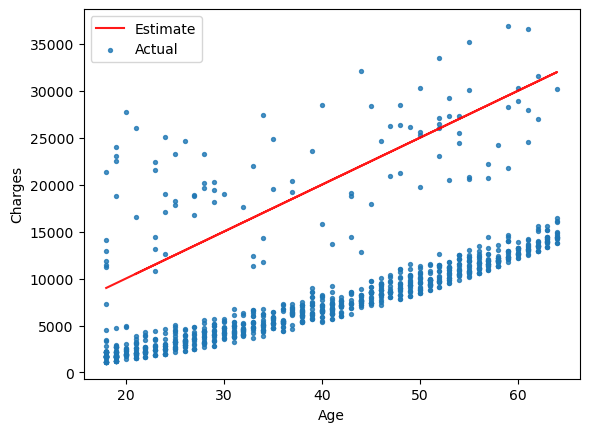

In [47]:
output_param1, w1, b1 = try_parameters(non_smoker_df, 500, 0)

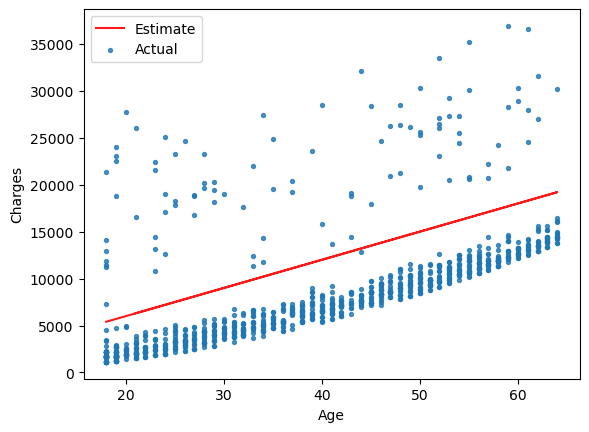

In [48]:
output_param2, w2, b2 = try_parameters(non_smoker_df, 300, 0)


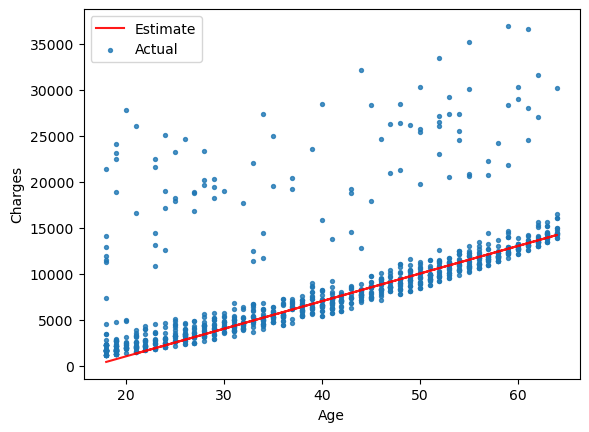

In [49]:
output_param3, w3, b3 = try_parameters(non_smoker_df, 300, -5000)

### HW5 Conclusion: hyperparameters

The main idea to achieve the best line is to first fix one parameter at 0 and find the best slope, then find the offset.
- The first graph fits the outliers well but ignores the main trend (500, 0). The slope is too steep for the main trend.
- The second graph uses a gentler slope to better match the main trend (300, 0), but the line is in the middle between outliers and the trend, so it predicts neither well.
- The third graph "lowers" the line to better fit the points, keeping the previously found slope unchanged (300, -5000).



**Task 6**: Write a function to compute root mean squared error (RMSE) according to the formula for this model accuracy metric using `numpy`.

Calculate RMSE for the parameter pairs you tried in Task 5.

What is the lowest loss value you can achieve? Can you come up with a general strategy for finding better values for $w$ and $b$ by trial and error?


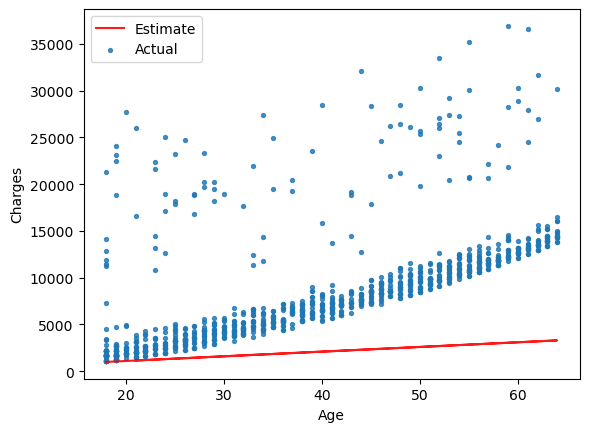

Params: (w=50, b=100), RMSE from lecture = 8461.949562575493


In [ ]:
# To evaluate whether the function we wrote works correctly, let's take the function from the LECTURE as a reference and compare the results for parameters 50 and 100.
output_param4,w_test, b_test = try_parameters(non_smoker_df, 50, 100)
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))
output_param1_rmse = rmse(non_smoker_df.charges, output_param4)
print(f'Params: (w={w_test}, b={b_test}), RMSE from lecture = {output_param1_rmse}')

In [ ]:
# Let's check if our function for calculating RMSE works correctly.
def rmse_my(target, predict, w, b):
    substraction = predict-target
    square = np.square(substraction)
    sum = np.sum(square)
    devide = sum/len(target)
    root = np.sqrt(devide)
    print(f'Params: (w={w}, b={b}), RMSE based on equation= {root}')
    return root

my_rmse_test = rmse_my(non_smoker_df.charges, output_param4, w_test, b_test)
if output_param1_rmse == my_rmse_test:
    print("Both RMSE are equal")

Params: (w=50, b=100), RMSE based on equation= 8461.949562575493
Both RMSE are equal


In [ ]:

# Calculate the RMSE for all three parameters from the previous task.
my_rmse_1 = rmse_my(non_smoker_df.charges, output_param1, w1, b1)
my_rmse_2 = rmse_my(non_smoker_df.charges, output_param2, w2, b2)
my_rmse_3 = rmse_my(non_smoker_df.charges, output_param3, w3, b3)

Params: (w=500, b=0), RMSE based on equation= 12618.449597865923
Params: (w=300, b=0), RMSE based on equation= 5777.9687699351425
Params: (w=300, b=-5000), RMSE based on equation= 4956.973980899423


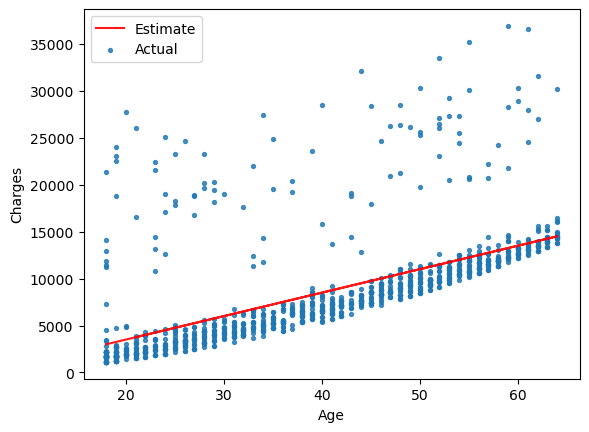

Params: (w=250, b=-1500), RMSE based on equation= 4669.651885507871


In [53]:
output_param5, w5, b5 = try_parameters(non_smoker_df, 250, -1500)
my_rmse_5 = rmse_my(non_smoker_df.charges, output_param5, w5, b5)


### HW6 Conclusion: RMSE

- If the line is closer to the outliers, we have the worst case: Params: (w=500, b=0), RMSE = 12618.45
- When the line roughly matches the main data trend, accuracy improves: Params: (w=300, b=0), RMSE = 5777.97
- Shifting the line down to be closer to the data gives the lowest error: RMSE = 4956.97 with (w=300, b=-5000)
- Further improvement: Params: (w=250, b=-1500), RMSE = 4669.65

So, the best parameter region is approximately:
- w [150:230]
- b [-1500:-3000]